In [1]:
#importing relevant libraries
'''

layers
layers to add to the nn

losses
loss function to consider

datasets
MNIST,CIFAR10,etc.

Models
Sequentail model of network usually used can sequentially add layers to build 

'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import losses,Sequential
from tensorflow.keras.layers import Input,GaussianNoise,Dense,Reshape,Flatten 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
#building the nn


In [2]:
#Loading CIFAR10
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

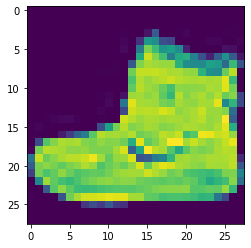

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train=x_train/255
x_test=x_test/255
print(x_train.shape)

(60000, 28, 28)


In [5]:
noise = GaussianNoise(0.2)

In [6]:
#Dense simpler but convolution network computationally more powerful
encoder = Sequential([
Flatten(input_shape=[28,28]),GaussianNoise(0.2), 
Dense(250,activation='relu'),
Dense(125,activation='relu'),
Dense(60,activation='relu'),
Dense(30,activation='relu')
])
decoder = Sequential([
Dense(60,activation='relu'),
Dense(125,activation='relu'),
Dense(250,activation='relu'),
Dense(28*28,activation='sigmoid'),
Reshape([28,28])
#opposite of encoder layers input output
])


In [7]:
autoencoder = Sequential([encoder,decoder])

In [8]:
autoencoder.compile(optimizer="adam", loss="mse")

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=8,
                shuffle=True,
                validation_data=[x_test, x_test])

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - val_loss: 0.0180
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - val_loss: 0.0160
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - val_loss: 0.0127


In [14]:
encoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 gaussian_noise_1 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 125)               31375     
                                                                 
 dense_2 (Dense)             (None, 60)                7560      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                        

In [11]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                1860      
                                                                 
 dense_5 (Dense)             (None, 125)               7625      
                                                                 
 dense_6 (Dense)             (None, 250)               31500     
                                                                 
 dense_7 (Dense)             (None, 784)               196784    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 237,769
Trainable params: 237,769
Non-trainable params: 0
_________________________________________________________________


In [12]:
noise_img = noise(x_test[0:1],training=True)
clear_img = autoencoder(noise_img[0:1])

Original


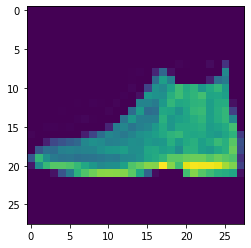

with noise


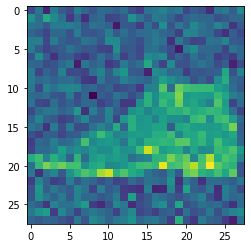

Denoised


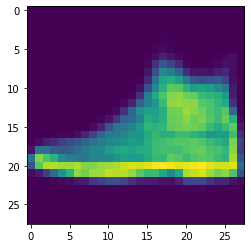

In [13]:
print("Original")
plt.imshow(x_test[0])
plt.show()
print("with noise")
plt.imshow(noise_img[0])
plt.show()
print("Denoised")
plt.imshow(clear_img[0])
plt.show()